In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("C:\\Users\\ritik\\Desktop\\MIT YEAR 3\\5th Sem\\B.Tech 5th sem Honours miniproject\\pd_speech_features.csv",skiprows=1)

In [4]:
df.shape


(756, 755)

In [5]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


In [9]:
df=df.groupby('id').mean().reset_index()
df.drop("id",axis=1,inplace=True)

In [10]:
corr_matrix = df.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                              gender       PPE       DFA      RPDE  numPulses  \
gender                     1.000000  0.014374  0.104643  0.182123  -0.509785   
PPE                        0.014374  1.000000 -0.113344 -0.474091   0.213316   
DFA                        0.104643 -0.113344  1.000000  0.171102  -0.296987   
RPDE                       0.182123 -0.474091  0.171102  1.000000  -0.556395   
numPulses                 -0.509785  0.213316 -0.296987 -0.556395   1.000000   
...                             ...       ...       ...       ...        ...   
tqwt_kurtosisValue_dec_33  0.131868  0.059702 -0.030422 -0.109201  -0.079303   
tqwt_kurtosisValue_dec_34  0.163985  0.081546  0.066398 -0.039366  -0.101547   
tqwt_kurtosisValue_dec_35  0.135109  0.077205  0.096407 -0.019258  -0.095644   
tqwt_kurtosisValue_dec_36  0.121971  0.075091  0.144736  0.037335  -0.080576   
class                      0.182713 -0.103041  0.322357  0.267733  -0.302712   

                  

In [11]:
#this is to remove highly correlated columns to reduce the feature space 
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue
 
    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue
 
        val = df[col].corr(df[col1])
 
        if val > 0.7: 
            columns.remove(col1)  #removes columns if correlation is more than 0.7
            continue
        else:
            filtered_columns.append(col1)
 
    df = df[filtered_columns]

In [12]:
df.head()

,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_16,...,locShimmer,locPctJitter,stdDevPeriodPulses,meanPeriodPulses,numPulses,RPDE,DFA,PPE,gender,class
0,4.021533,12.293333,1.561733,1.591700,2.437633,1.694267,1.756133,2.100667,3.063067,4.269433,...,0.071003,0.001963,0.000073,0.008220,235.333333,0.567250,0.696370,0.823387,1.0,1.0
1,5.490533,6.117633,4.918567,1.881900,1.831233,1.862933,2.157100,2.484133,1.935867,4.320633,...,0.062710,0.005790,0.001849,0.008884,213.333333,0.592453,0.793993,0.415637,0.0,1.0
2,9.176633,14.584467,41.129400,1.590333,1.577067,2.301967,1.673333,1.589467,1.735567,2.124967,...,0.040953,0.002217,0.000104,0.006041,319.333333,0.520563,0.619967,0.801973,1.0,1.0
3,3.184433,2.842167,1.677633,5.676767,4.138300,2.357367,2.148733,2.058267,2.358100,1.956833,...,0.049467,0.000757,0.000042,0.003913,493.000000,0.537183,0.626097,0.828707,0.0,1.0
4,7.268333,2.953200,4.104600,3.614567,3.384267,1.897600,1.903700,2.167767,2.706200,3.158533,...,0.159193,0.003593,0.002023,0.005622,362.666667,0.726717,0.779397,0.831287,0.0,1.0


In [13]:
df.shape

(252, 287)

In [14]:
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape


C:\Users\ritik\AppData\Local\Temp\ipykernel_27236\2065603823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = df['class']


(252, 31)

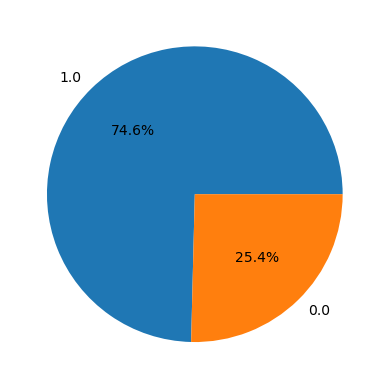

In [15]:
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

In [16]:
features = df.drop('class', axis=1)
target = df['class']
 
X_train, X_val,Y_train, Y_val = train_test_split(features, target,test_size=0.2,random_state=10)
X_train.shape, X_val.shape

((201, 30), (51, 30))

In [17]:
# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape

((302, 30), (302,))

LOGISTIC REGRESSION

In [18]:
lr=LogisticRegression()
lr.fit(X, Y)
    
print('Logistic Regression :')
    
# Predict probabilities for training set (if supported)
train_preds = lr.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))
   
# Predict probabilities for validation set
val_preds = lr.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds))
print()

Logistic Regression :
Training Accuracy (ROC AUC): 0.8293057322047279
Validation Accuracy (ROC AUC): 0.8146718146718146



C:\Users\ritik\anaconda3\envs\learnPandas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


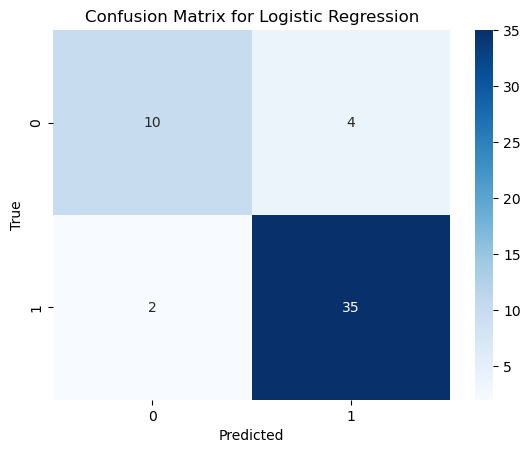

In [19]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, lr.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [20]:
print(metrics.classification_report(Y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.90      0.95      0.92        37

    accuracy                           0.88        51
   macro avg       0.87      0.83      0.85        51
weighted avg       0.88      0.88      0.88        51



SUPPORT VECTOR CLASSIFICATION (SVC)

In [21]:
svc=SVC(kernel='rbf', probability=True)
svc.fit(X, Y)
    
print('Support vector classification (SVC) :')
    
# Predict probabilities for training set (if supported)
train_preds = svc.predict_proba(X)[:, 1]
print('Training Accuracy (ROC AUC):', ras(Y, train_preds))
   
# Predict probabilities for validation set
val_preds = svc.predict_proba(X_val)[:, 1]
print('Validation Accuracy (ROC AUC):', ras(Y_val, val_preds))
print()

Support vector classification (SVC) :
Training Accuracy (ROC AUC): 0.7105828691724047
Validation Accuracy (ROC AUC): 0.7586872586872587



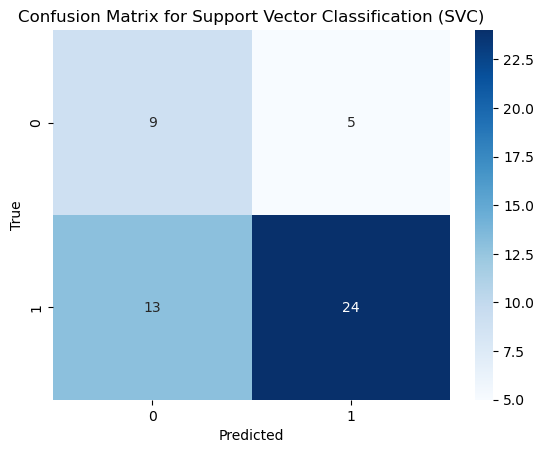

In [22]:
# Compute confusion matrix
cm = confusion_matrix(Y_val, svc.predict(X_val))

# Plot using seaborn heatmap
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Support Vector Classification (SVC)')
plt.show()

In [23]:
print(metrics.classification_report(Y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

         0.0       0.41      0.64      0.50        14
         1.0       0.83      0.65      0.73        37

    accuracy                           0.65        51
   macro avg       0.62      0.65      0.61        51
weighted avg       0.71      0.65      0.66        51

